In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [86]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
df.shape

(10000, 14)

In [88]:
# finding missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [89]:
# checking duplicated rows
df.duplicated().sum()

0

In [90]:
# checking number of customer exited the company.
df['Exited'].value_counts()

# imbalance classication problem. It wont make perfect problem but we are not actually solving problem..just understanding it.

Exited
0    7963
1    2037
Name: count, dtype: int64

In [91]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [92]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [93]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [94]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
# We need to find out whether these columns are useful using EDA. BUT WE DONT NEED perfect model, 
# we justwant to learn how to build artificial neural network using keras.

In [96]:
# we need to transform some columns: geography, gender.
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
# Now all our data is in numerical

In [97]:
# Our data is some in small and some in large values, we need to scale the values.

In [98]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [99]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [100]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [101]:
X_train.shape

(8000, 11)

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [104]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [105]:
# In keras we can make sequntial and non-sequantial mode

In [106]:
model = Sequential()

In [107]:
# Now we have built the model
# We will have one input layer, one hidden layer and one output layer.
# For starting we keep 3 nodes or 3 perseptrons.

In [108]:
# dense creates a dense layer and our activation function is sigmoid.
# our activation hidden layer is connected with input layer we need to  mention number of inputs that connects with it
model.add(Dense(11, activation='relu', input_dim = 11))

# we increased one more larer as we got 82... as accuracy
model.add(Dense(11, activation='relu'))

# Now we will will add one output layer
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# We need to compile model
# during compiling, we need to specify what loss function we are using, what optimisier we are using for gradient descent.
# loss function we are using is binary cross entropy the problem we are solving is binary classification.
# optimizer for gradient decent we are using is adam
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [121]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.2)
# Here where our neural network gets trained.
# and with every epoch our loss will gets minimised.

# training accuracy should also be increased and also validation.
# if only training accuary increased but not validaton then itll be overfitting case.

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3158 - val_accuracy: 0.8519 - val_loss: 0.3503
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 0.3381 - val_accuracy: 0.8512 - val_loss: 0.3545
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.3343 - val_accuracy: 0.8537 - val_loss: 0.3516
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3263 - val_accuracy: 0.8531 - val_loss: 0.3518
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3144 - val_accuracy: 0.8506 - val_loss: 0.3531
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3173 - val_accuracy: 0.8550 - val_loss: 0.3510
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3202 - val_accuracy: 0.8562 - val_loss: 0.3522
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8745 - loss: 0.3077 - val_accu

In [112]:
model.layers[0].get_weights()

[array([[ 0.29996037,  0.2191064 , -0.08737317,  0.12637731,  0.15638325,
         -0.00801197, -0.07145791, -0.3787017 ,  0.20582213,  0.23592569,
         -0.04158369],
        [ 0.50845385, -0.70439106, -0.4192098 , -0.9018632 ,  0.33285686,
          0.6709925 , -0.266782  ,  0.16376565, -0.06948148, -0.88512105,
         -0.9131947 ],
        [-0.13410309, -0.2031747 ,  0.17830415, -0.285282  , -0.78032196,
          0.1552394 , -0.00296458,  0.03095855,  0.06296961, -0.27379414,
          0.2729024 ],
        [-0.3868559 ,  0.97278285, -0.18447576,  0.0115534 ,  0.10978338,
         -0.35483876, -0.09251174, -0.13627003,  0.5900721 , -0.05521918,
          0.28520733],
        [-0.46083236, -0.48318905,  0.21348079, -0.12017862, -0.30976877,
         -0.12525925, -1.2515123 ,  0.5033945 ,  1.0737389 ,  0.01805365,
         -0.20564961],
        [ 0.12220656, -0.46771684, -0.19460934,  0.05569829, -0.30664507,
          0.04059617, -0.18206866, -0.02532827, -0.04542169, -0.6636076

In [113]:
model.layers[1].get_weights()

[array([[-0.22236328, -0.5078777 ,  0.76461947, -0.02565888,  0.32396385,
         -0.04171626, -0.51963025,  0.1336133 ,  0.12160064, -0.04145158,
         -0.34226927],
        [-0.01488499, -0.35374248, -0.7857031 ,  0.08719806, -0.21255386,
          0.32633877,  0.09138916,  0.55946565, -0.32729024, -0.13527748,
          0.0419825 ],
        [ 0.51270986,  0.69280523,  0.01299344, -0.17034048,  0.25944707,
          0.453026  ,  0.22039258, -0.42309123, -0.08647892,  0.37509584,
          0.07263298],
        [ 0.43978685,  0.01974172, -0.11459926,  0.66134644,  0.45448527,
         -0.3857941 ,  0.7727624 ,  0.0755213 , -0.3912711 ,  0.46748328,
          0.6731649 ],
        [ 0.14736576, -0.14602803,  0.50175405,  0.12522183,  0.15537538,
          0.46460876, -0.43104836,  0.5254486 , -0.11628056,  0.21995355,
          0.16600993],
        [ 0.10091276, -0.35979423,  0.12409852,  0.5140182 ,  0.45009154,
          0.4540029 , -0.38337997, -0.40345716, -0.22705175,  0.1457100

In [114]:
# Now we can predict.
model.predict(X_test_scaled)
# our ouput is not 1 or zero becuase we used sigmoid function and sigmoid function returns us probbaility between 0 and 1.
# now we need to convert it to zero and one.
# we will use threshold for that.
# to find threshold really we need to use roc, auc curve graph.
# but lets assume threshold as 0.5

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.04282357],
       [0.10477149],
       [0.10908514],
       ...,
       [0.00499179],
       [0.03066427],
       [0.39480495]], dtype=float32)

In [115]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [116]:
np.where(y_log>0.5, 1, 0)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [117]:
y_pred = np.where(y_log>0.5, 1, 0)

In [118]:
# lets check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.866

In [119]:
# we can make changes in our neural network and improve our output.
# no of epochs
# making hidden layer as RELU.
# increasing the number of nodes.
# increasing the hidden layers

In [120]:
# first we used activation as relu and got accuracy 82.35
# now lets use relu

In [123]:
# lets plot a graph.

In [124]:
history

In [125]:
history.history

{'accuracy': [0.8656250238418579,
  0.8659374713897705,
  0.8657812476158142,
  0.866406261920929,
  0.8653125166893005,
  0.8671875,
  0.8660937547683716,
  0.8665624856948853,
  0.8650000095367432,
  0.8662499785423279,
  0.8643749952316284,
  0.8665624856948853,
  0.8665624856948853,
  0.8668749928474426,
  0.8673437237739563,
  0.8654687404632568,
  0.8667187690734863,
  0.8678125143051147,
  0.8654687404632568,
  0.8667187690734863,
  0.8671875,
  0.8660937547683716,
  0.8668749928474426,
  0.8689062595367432,
  0.8665624856948853,
  0.8675000071525574,
  0.8670312762260437,
  0.8676562309265137,
  0.8659374713897705,
  0.8671875,
  0.8657812476158142,
  0.8660937547683716,
  0.8684375286102295,
  0.8701562285423279,
  0.8693749904632568,
  0.8684375286102295,
  0.8693749904632568,
  0.8670312762260437,
  0.8662499785423279,
  0.8670312762260437,
  0.8671875,
  0.8696874976158142,
  0.8682812452316284,
  0.8671875,
  0.866406261920929,
  0.8684375286102295,
  0.867968738079071,
  

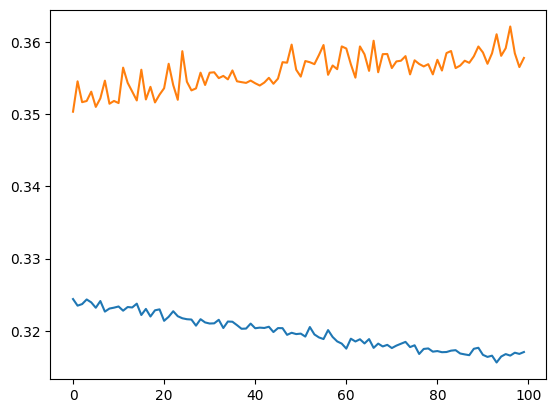

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

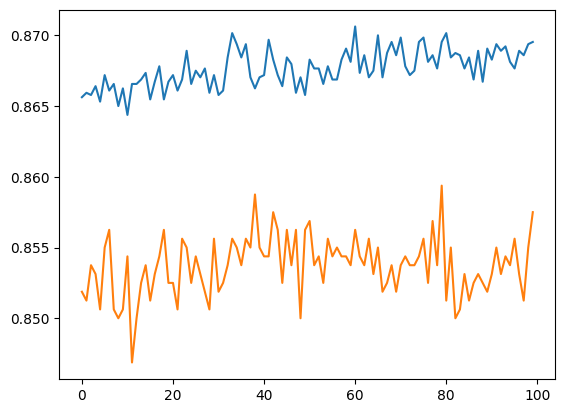

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])